# StochPy Demonstration and Performance Analysis

The purpose of this document is to demonstrate how the StochPy library is used, both on its own and in other libraries, and the performance shorcomings of the library. When we have implemented our new iterations of the StochPy library, we will demonstrate the performance improvements here.

### What this notebook shows
1. Basic functionality of the StochPy library
2. Performance analysis of the StochPy library
3. Demonstration of other libraries that implement the StochPy library
4. Performance analysis of the StochPy library within the context of these other libraries
5. Methods of improving the performance of the StochPy library
6. Demonstration of performance improvements

## StochPy Demonstration
### Importing StochPy in Jupyter

To install the StochPy library and all necessary dependencies in Jupyter Notebook we want to run the following command:

In [ ]:
import sys
!{sys.executable} -m pip install scipy matplotlib python-libsbml jedi==0.17.2 ipython stochpy

This will install the necessary libraries to the associated python kernel. Which allows them to be imported here:

In [ ]:
import stochpy

### Running Stochpy simulations
We can now run stochastic simulations using StochPy. Here we will be using the direct method. That is, we will be using the Gillespie algorithm to generate statistically correct trajectories for stochastic equation systems.

To do this we must first create an SSA object as follows. We can then do any of the following simulations.

In [ ]:
smod = stochpy.SSA()

#### Basic Simulation using the Direct method
Here we do a basic simulation and plot the species time series, waiting time distribution, and propensities time series.

Reaction	Mean
R1	0.101
R2	0.100


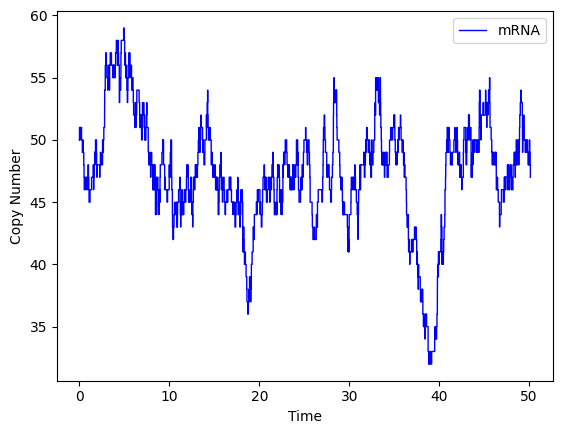

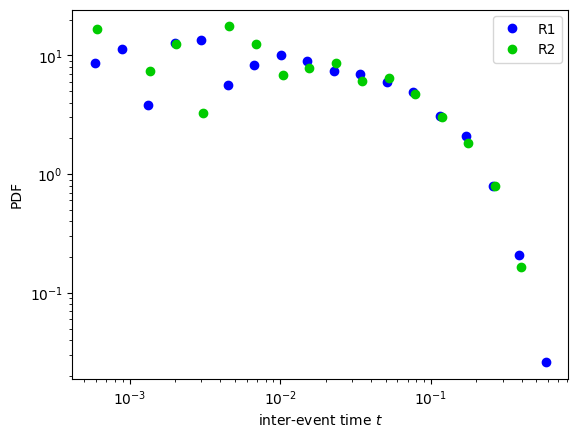

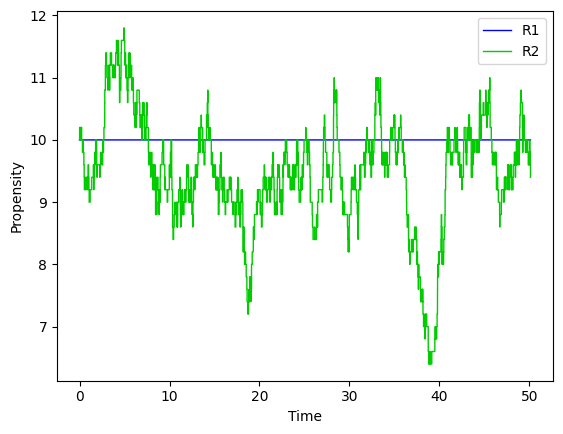

In [9]:
smod.DoStochSim(IsTrackPropensities=True)
smod.data_stochsim.simulation_endtime
smod.data_stochsim.simulation_timesteps
smod.GetWaitingtimes()
smod.PrintWaitingtimesMeans()
smod.PlotSpeciesTimeSeries()
smod.PlotWaitingtimesDistributions()
smod.PlotPropensitiesTimeSeries()

This simulation demonstrates basic usage of the library. However, we want to demonstrate the performance issues of running more complex simulations. We want to see the growth rate of the direct method.

### Long Simulation
We can do a computationally expensive simulation as such:

In [14]:
smod.DoStochSim(trajectories=1,end=100000,mode='steps')
smod.PrintSpeciesMeans()
smod.PrintSpeciesStandardDeviations()

Species	Mean
mRNA	49.764
Species	Standard Deviation
mRNA	6.967


### Growth rate of direct method simulation

In [17]:
import time
import matplotlib.pyplot as plt

This script will run 100 simulations, and store the time each simulation takes in the y array.

In [ ]:
x = []
y = []
for i in range(10):
    start_time = time.time()
    smod.DoStochSim(trajectories=1,end=i*10000,mode='steps')
    end_time = time.time()
    total_time = end_time - start_time
    x.append(i*10000)
    y.append(total_time)
    print(i)

Alternatively to running the simulations, you can use the data I found for range = 100:

In [69]:
x = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000, 330000, 340000, 350000, 360000, 370000, 380000, 390000, 400000, 410000, 420000, 430000, 440000, 450000, 460000, 470000, 480000, 490000, 500000, 510000, 520000, 530000, 540000, 550000, 560000, 570000, 580000, 590000, 600000, 610000, 620000, 630000, 640000, 650000, 660000, 670000, 680000, 690000, 700000, 710000, 720000, 730000, 740000, 750000, 760000, 770000, 780000, 790000, 800000, 810000, 820000, 830000, 840000, 850000, 860000, 870000, 880000, 890000, 900000, 910000, 920000, 930000, 940000, 950000, 960000, 970000, 980000, 990000]
y = [0.028216123580932617, 0.15805315971374512, 0.31827569007873535, 0.5271267890930176, 0.6301794052124023, 0.8718817234039307, 0.9705214500427246, 1.1743502616882324, 1.3407220840454102, 1.5472009181976318, 1.6604535579681396, 1.83620023727417, 2.0362746715545654, 2.3111298084259033, 2.265662908554077, 2.5155045986175537, 2.83278489112854, 2.7717983722686768, 3.0468647480010986, 3.109009027481079, 3.1906158924102783, 3.392347812652588, 3.5214743614196777, 3.7653982639312744, 3.8501412868499756, 3.9823687076568604, 4.233356475830078, 4.3079516887664795, 4.447680473327637, 4.661872863769531, 4.821987867355347, 4.963478326797485, 5.199542284011841, 5.22298526763916, 5.472687244415283, 5.711747646331787, 5.780184030532837, 5.78303861618042, 6.129201650619507, 6.161880731582642, 6.415082693099976, 6.5176355838775635, 6.67507791519165, 6.88660454750061, 6.9272449016571045, 7.1871607303619385, 7.36649227142334, 7.430497884750366, 7.742856025695801, 7.760221004486084, 7.961325645446777, 8.096840143203735, 8.25725769996643, 8.315808534622192, 8.656062841415405, 8.719774723052979, 8.8824303150177, 9.044514656066895, 9.167853355407715, 9.225298166275024, 9.53031873703003, 9.707405090332031, 9.811569452285767, 9.839672088623047, 10.157910823822021, 10.368763446807861, 10.44493317604065, 10.601564407348633, 10.767151117324829, 10.925857305526733, 11.087729692459106, 11.259968280792236, 11.22965669631958, 11.642032623291016, 11.709104061126709, 11.767329931259155, 12.036709070205688, 12.04562258720398, 12.247276782989502, 12.63867449760437, 12.576724767684937, 12.664931774139404, 12.889829397201538, 13.000956773757935, 13.243353128433228, 13.673370599746704, 13.540260553359985, 13.815625429153442, 13.921473503112793, 13.922622442245483, 14.033090591430664, 14.425411462783813, 14.324872970581055, 14.731309413909912, 14.849748611450195, 15.015831470489502, 15.06694746017456, 15.514809370040894, 15.322012901306152, 15.600376844406128]

Slope:  1.564953573494747e-05
Intercept:  0.11088982010831956


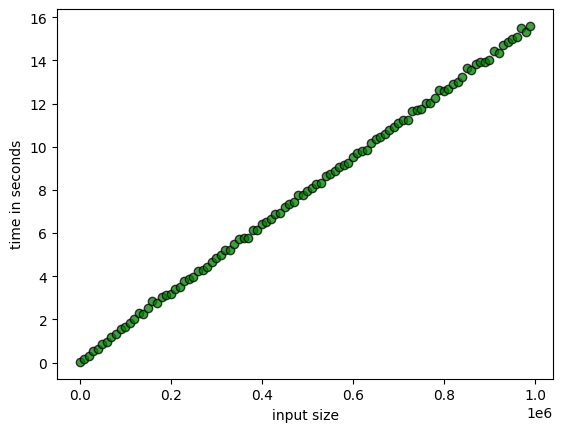

In [71]:
plt.scatter(x, y, c='green', edgecolor='black', linewidth=1, alpha=0.75)
plt.xlabel("input size")
plt.ylabel("time in seconds")
#Fit linear regression via least squares. Slope b and intercept a. deg = polynomial degree
b, a = np.polyfit(x, y, deg=1)
print("Slope: ", b)
print("Intercept: ", a)

The growthrate of the direct method is linear with a slope of about 1.565e-05. So the time complexity of the algorithm is not something that needs to be improved. However, as most simulations will have a large input size, often well over one million, execution can still take a substantial amount of time. Given the parallelizable nature of the algorithm, we should be able to dramatically reduce the execution time at high input sizes.